# News Headlines Sentiment

Use the news api to pull the latest news articles for bitcoin and ethereum and create a DataFrame of sentiment scores for each coin. 

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [140]:
import os
import re
import pandas as pd

In [141]:
from dotenv import load_dotenv
from newsapi import NewsApiClient
from string import punctuation
from collections import Counter
from wordcloud import WordCloud

In [142]:
import matplotlib.pyplot as plt
import matplotlib as mpl

In [143]:
import spacy
from spacy import displacy

In [144]:
import nltk
from nltk import ngrams
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.tokenize import word_tokenize, sent_tokenize

In [43]:
# Download/Update the VADER Lexicon
nltk.download('vader_lexicon')

# Download stopwords
nltk.download('stopwords')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\nospm\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nospm\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [6]:
%matplotlib inline


Bad key "text.kerning_factor" on line 4 in
C:\Users\nospm\anaconda3\envs\pyvizenv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [7]:
# Initialize the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

In [8]:
# Load .env environment variables
load_dotenv()

True

In [9]:
# Read your api key environment variable
api_key = os.getenv("NEWS_API_KEY")
type(api_key)

str

In [10]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)

In [11]:
# Fetch the Bitcoin news articles
btc_headlines = newsapi.get_everything(
    q="Bitcoin", 
    language="en", 
    sort_by="relevancy",
    page_size=100)

In [13]:
# type(btc_headlines)

In [14]:
# Print total articles
print(f"Total articles about Bitcoin: {btc_headlines['totalResults']}")

Total articles about Bitcoin: 8816


In [19]:
# Show sample headline
btc_headlines["articles"][0]

{'source': {'id': 'engadget', 'name': 'Engadget'},
 'author': 'Jon Fingas',
 'title': 'Tesla buys $1.5 in Bitcoin, will soon accept it as payment',
 'description': 'Elon Musk’s cryptocurrency hype was more than just idle talk. CNBC reports that Tesla not only bought $1.5 billion worth of Bitcoin to help “diversify and maximize” its returns, but will start taking payments using the digital asset sometime in the “near futu…',
 'url': 'https://www.engadget.com/tesla-to-take-bitcoin-payments-140109988.html',
 'urlToImage': 'https://s.yimg.com/os/creatr-uploaded-images/2021-02/389f89e0-6a11-11eb-b5c5-309f2241e56a',
 'publishedAt': '2021-02-08T14:01:09Z',
 'content': 'Elon Musks cryptocurrency hype was more than just idle talk. CNBCreports that Tesla not only bought $1.5 billion worth of Bitcoin to help diversify and maximize its returns, but will start taking pay… [+1182 chars]'}

In [16]:
# Fetch the Ethereum news articles
eth_headlines = newsapi.get_everything(
    q="Ethereum", 
    language="en", 
    sort_by="relevancy",
    page_size=100)

In [17]:
# Print total articles
print(f"Total articles about Ethereum: {eth_headlines['totalResults']}")

Total articles about Ethereum: 1772


In [18]:
def get_sentiment_df(articles):
    sentiments = []
    for article in articles:
        try:
            text = article["content"]
            sentiment = analyzer.polarity_scores(text)
            compound = sentiment["compound"]
            neg = sentiment["neg"]
            neu = sentiment["neu"]
            pos = sentiment["pos"]            

            sentiments.append({
                "Compound": compound,
                "Negative": neg,
                "Neutral": neu,
                "Positive": pos,
                "Text": text })

        except AttributeError:
            pass

    # Create DataFrame
    df = pd.DataFrame(sentiments)

    # Reorder DataFrame columns
    cols = ["Compound", "Negative", "Neutral", "Positive", "Text"]
    df = df[cols]

    return df

In [63]:
# Create the Bitcoin sentiment scores DataFrame
btc_df = get_sentiment_df(btc_headlines["articles"])
btc_df.head()

,Compound,Negative,Neutral,Positive,Text
0,0.3182,0.000,0.909,0.091,Elon Musks cryptocurrency hype was more than j...
1,0.3818,0.000,0.929,0.071,"Tesla, led by Elon Musk, confirmed that it pur..."
2,-0.1027,0.038,0.962,0.000,"For a brief moment on Sunday, before Tesla sai..."
3,0.2500,0.000,0.944,0.056,Twitter and Square CEO Jack Dorsey and rapper ...
4,0.6597,0.000,0.863,0.137,"Today in an SEC filing, Tesla disclosed that i..."


In [57]:
btc_df.shape

(96, 5)

In [21]:
# Create the ethereum sentiment scores DataFrame
eth_df = get_sentiment_df(eth_headlines["articles"])
eth_df.head()

,Compound,Negative,Neutral,Positive,Text
0,-0.3400,0.119,0.818,0.063,Worried that the GeForce RTX 3060 will be sold...
1,0.0000,0.000,1.000,0.000,Coinbase plans to go public by way of a direct...
2,0.0000,0.000,1.000,0.000,FILE PHOTO: Representation of the Ethereum vir...
3,0.0000,0.000,1.000,0.000,By Reuters Staff\r\nFILE PHOTO: Representation...
4,0.7096,0.000,0.856,0.144,Attempting to get ahead of cryptocurrency mine...


In [22]:
# Describe the Bitcoin Sentiment
btc_df.describe()

,Compound,Negative,Neutral,Positive
count,96.000000,96.000000,96.000000,96.000000
mean,0.120220,0.028344,0.911042,0.060594
std,0.397863,0.052524,0.083425,0.072086
min,-0.844200,0.000000,0.645000,0.000000
25%,-0.025675,0.000000,0.854750,0.000000
50%,0.000000,0.000000,0.925500,0.050000
75%,0.440400,0.051250,1.000000,0.093000
max,0.921700,0.227000,1.000000,0.353000


In [23]:
# Describe the Ethereum Sentiment
eth_df.describe()

,Compound,Negative,Neutral,Positive
count,92.000000,92.000000,92.000000,92.000000
mean,0.193577,0.027685,0.900076,0.072228
std,0.387986,0.050082,0.084818,0.076758
min,-0.709600,0.000000,0.667000,0.000000
25%,0.000000,0.000000,0.847000,0.000000
50%,0.165500,0.000000,0.903000,0.071500
75%,0.498075,0.042250,1.000000,0.124000
max,0.900100,0.175000,1.000000,0.333000


### Questions:

Q: Which coin had the highest mean positive score?

A: 

Q: Which coin had the highest compound score?

A: 

Q. Which coin had the highest positive score?

A: 

---

# Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [124]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Init regex
    regex = re.compile("[^a-zA-Z ]")

    # Substitute everything that is NOT a letter with empty string
    text_clean = regex.sub('', text)

    # Tokenize words
    words = word_tokenize(text_clean)

    # Init lemmatizer
    lemmatizer = WordNetLemmatizer()
    
    # Lemmatize Words into root words (this should happen before stopwording)
    lem_words = [lemmatizer.lemmatize(word) for word in words]

    # Init stop words
    sw = set(stopwords.words('english'))

    # Custom extended stopwords 
    sw_extended = {'said', 'sent', 'found', 'including', 'today', 'announced', 'week', 'basically', 'also'}

    # Replace stop words and lowercase
    tokens = [word.lower() for word in lem_words if word.lower() not in sw.union(sw_extended)]
    
    return tokens

In [125]:
# Create a new tokens column for bitcoin
btc_token_list = [tokenizer(text) for text in btc_df['Text'].tolist()]

# Make sure same length as btc_df
len(btc_token_list)

96

In [192]:
# Append tokens column to btc_df
btc_df['Tokens'] = btc_token_list
btc_df.head()

,Compound,Negative,Neutral,Positive,Text,Tokens
0,0.3182,0.000,0.909,0.091,Elon Musks cryptocurrency hype was more than j...,"[elon, musks, cryptocurrency, hype, wa, idle, ..."
1,0.3818,0.000,0.929,0.071,"Tesla, led by Elon Musk, confirmed that it pur...","[tesla, led, elon, musk, confirmed, purchased,..."
2,-0.1027,0.038,0.962,0.000,"For a brief moment on Sunday, before Tesla sai...","[brief, moment, sunday, tesla, invested, billi..."
3,0.2500,0.000,0.944,0.056,Twitter and Square CEO Jack Dorsey and rapper ...,"[twitter, square, ceo, jack, dorsey, rapper, j..."
4,0.6597,0.000,0.863,0.137,"Today in an SEC filing, Tesla disclosed that i...","[sec, filing, tesla, disclosed, ha, acquired, ..."


In [195]:
# Calculate mean positive score
print(f'BTC mean positive score: {btc_df["Positive"].mean()}')

BTC mean positive score: 0.06059375


In [196]:
# Calculate highest negative score
print(f'BTC highest negative score: {btc_df["Negative"].max()}')

BTC highest negative score: 0.227


In [198]:
# Calculate highest positive score
print(f'BTC highest positive score: {btc_df["Positive"].max()}')

BTC highest positive score: 0.353


In [127]:
# Create a new tokens column for ethereum
eth_token_list = [tokenizer(text) for text in eth_df['Text'].tolist()]
eth_df['Tokens'] = eth_token_list
eth_df.head()

,Compound,Negative,Neutral,Positive,Text,Tokens
0,-0.3400,0.119,0.818,0.063,Worried that the GeForce RTX 3060 will be sold...,"[worried, geforce, rtx, sold, cryptocurrency, ..."
1,0.0000,0.000,1.000,0.000,Coinbase plans to go public by way of a direct...,"[coinbase, plan, go, public, way, direct, list..."
2,0.0000,0.000,1.000,0.000,FILE PHOTO: Representation of the Ethereum vir...,"[file, photo, representation, ethereum, virtua..."
3,0.0000,0.000,1.000,0.000,By Reuters Staff\r\nFILE PHOTO: Representation...,"[reuters, stafffile, photo, representation, et..."
4,0.7096,0.000,0.856,0.144,Attempting to get ahead of cryptocurrency mine...,"[attempting, get, ahead, cryptocurrency, miner..."


---

In [199]:
# Calculate mean positive score
print(f'ETH mean positive score: {eth_df["Positive"].mean()}')

ETH mean positive score: 0.07222826086956521


In [200]:
# Calculate highest negative score
print(f'ETH highest negative score: {eth_df["Negative"].max()}')

ETH highest negative score: 0.175


In [201]:
# Calculate highest positive score
print(f'ETH highest positive score: {eth_df["Positive"].max()}')

ETH highest positive score: 0.333


# NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [128]:
# Aggregate all tokens for all BTC articles
# Use extend to flatten list
btc_tokens_all = []
[btc_tokens_all.extend(token_list) for token_list in btc_df['Tokens'].tolist()]
len(btc_tokens_all)

1913

In [129]:
# Aggregate all tokens for all BTC articles
eth_tokens_all = []
[eth_tokens_all.extend(token_list) for token_list in eth_df['Tokens'].tolist()]
len(eth_tokens_all)

1866

In [130]:
# Generate the Bitcoin N-grams where N=2
btc_ngram_counts = Counter(ngrams(btc_tokens_all, n=2))
btc_ngram_dict = dict(btc_ngram_counts)

In [131]:
# Display top 10
btc_ngram_counts.most_common(10)

[(('char', 'reuters'), 19),
 (('elon', 'musk'), 11),
 (('record', 'high'), 10),
 (('reuters', 'bitcoin'), 10),
 (('billion', 'bitcoin'), 8),
 (('virtual', 'currency'), 8),
 (('tesla', 'inc'), 7),
 (('currency', 'bitcoin'), 7),
 (('illustration', 'taken'), 7),
 (('feb', 'reuters'), 6)]

In [132]:
# Generate the Ethereum N-grams where N=2
eth_ngram_counts = Counter(ngrams(eth_tokens_all, n=2))
eth_ngram_dict = dict(eth_ngram_counts)

In [133]:
# Display top 10
eth_ngram_counts.most_common(10)

[(('char', 'reuters'), 11),
 (('record', 'high'), 11),
 (('feb', 'reuters'), 9),
 (('new', 'york'), 9),
 (('char', 'new'), 8),
 (('graphic', 'world'), 8),
 (('world', 'fx'), 8),
 (('fx', 'rate'), 8),
 (('char', 'dollar'), 7),
 (('virtual', 'currency'), 6)]

In [134]:
# Use the token_count function to generate the top 10 words from each coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""

    return Counter(tokens).most_common(N)

In [135]:
# Get the top 10 words for Bitcoin
token_count(btc_tokens_all)

[('char', 93),
 ('bitcoin', 77),
 ('reuters', 50),
 ('ha', 21),
 ('tesla', 20),
 ('cryptocurrency', 18),
 ('elon', 16),
 ('currency', 15),
 ('billion', 14),
 ('photo', 14)]

In [136]:
# Get the top 10 words for Ethereum
token_count(eth_tokens_all)

[('char', 91),
 ('reuters', 38),
 ('bitcoin', 29),
 ('cryptocurrency', 22),
 ('ethereum', 22),
 ('new', 19),
 ('dollar', 19),
 ('high', 18),
 ('world', 16),
 ('us', 15)]

# Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [137]:
# Plot config
mpl.rcParams['figure.figsize'] = [15.0, 15.0]
plt.style.use('seaborn-whitegrid')

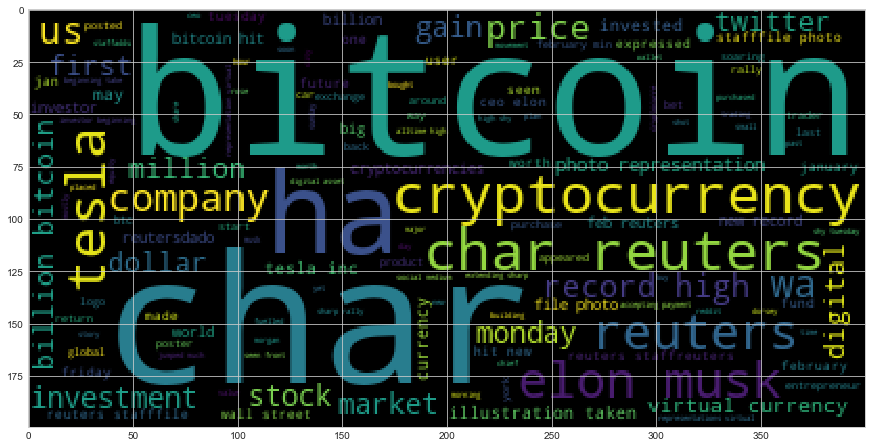

In [138]:
# Generate the Bitcoin word cloud
btc_wc = WordCloud().generate(' '.join(btc_tokens_all))
plt.imshow(btc_wc)

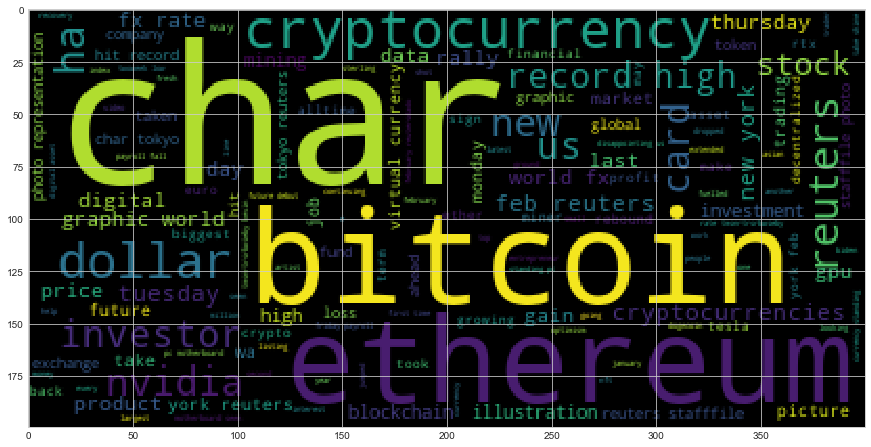

In [139]:
# Generate the Ethereum word cloud
eth_wc = WordCloud().generate(' '.join(eth_tokens_all))
plt.imshow(eth_wc)

# Named Entity Recognition

In this section, you will build a named entity recognition model for both coins and visualize the tags using SpaCy.

In [147]:
# Optional - download a language model for SpaCy
# !python -m spacy download en_core_web_sm

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [148]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

## Bitcoin NER

In [173]:
# Concatenate all of the bitcoin text together
btc_text_all = ' '.join(btc_df['Text'].tolist())
# print(f'All text: {btc_text_all}')

In [174]:
# Run the NER processor on all of the text
btc_nlp_tokens = nlp(btc_text_all)

# Add a title to the document
btc_nlp_tokens.user_data["title"] = "Bitcoin Named Entity Recognition (NER)"

In [175]:
# Render the visualization
displacy.render(btc_nlp_tokens, style='ent')

In [179]:
# List all Entities
btc_doc = nlp(btc_text_all)
for ent in btc_doc.ents:
    print(ent.text, ent.label_)

Tesla ORG
$1.5 billion MONEY
Elon Musk PERSON
about $ 1.5 billion MONEY
January DATE
Artur ORG
Widak PRODUCT
NurPhoto ORG
Sunday DATE
Tesla ORG
$1.5 billion MONEY
Jack Dorsey PERSON
Jay Z PERSON
Africa LOC
India GPE
Dorsey ORG
Friday DATE
500 CARDINAL
Today DATE
SEC ORG
Tesla ORG
$1.5 billion MONEY
first ORDINAL
more than a decade later DATE
Mt. Gox LOC
2014 DATE
Bitcoin exchange ORG
850,000 CARDINAL
thousands CARDINAL
21.11 MONEY
Jan. 28 DATE
70% PERCENT
Bitcoin PERSON
Feb. 9, 2021 DATE
8:01 a.m. TIME
Feb. 9, 2021 DATE
8:01 a.m. TIME
Bitcoin PERSON
Teslas PERSON
Monday DATE
1.5 MONEY
Bitcoin PERSON
this morning TIME
over $50,000 MONEY
Jack Dorsey PERSON
Jay Z PERSON
Datadog ORG
Startup Battlefield ORG
BuzzFeed ORG
AI ORG
Daily Crunch WORK_OF_ART
February 12, 2021 DATE
Bitcoins PERSON
recent weeks DATE
Friday DATE
Francis Suarez PERSON
Friday DATE
Elon Musk PERSON
Twitter PRODUCT
Musk PERSON
Joe Bidens PERSON
the U.S. Treasury Department ORG
Michael S. Barr PERSON
Alabamas PERSON
Richa

---

## Ethereum NER

In [185]:
# Concatenate all of the Ethereum text together
eth_text_all = ' '.join(eth_df['Text'].tolist())

In [186]:
# Run the NER processor on all of the text
eth_nlp_tokens = nlp(eth_text_all)

In [187]:
# Add a title to the document
eth_nlp_tokens.user_data["title"] = "Ethereum Named Entity Recognition (NER)"

In [188]:
# Render the visualization
displacy.render(btc_nlp_tokens, style='ent')

In [189]:
# List all Entities
eth_doc = nlp(eth_text_all)
for ent in eth_doc.ents:
    print(ent.text, ent.label_)

GeForce ORG
3060 GPE
GPU ORG
today DATE
2012 DATE
Ethereum ORG
February 3, 2018 DATE
Reuters ORG
Reuters ORG
Ethereum ORG
February 3, 2018 DATE
3060 DATE
GPU ORG
next week DATE
Nvidia PERSON
this morning TIME
Reuters ORG
SINGAPORE GPE
Feb 9 DATE
Reuters ORG
Asia LOC
Tuesday DATE
Tesla Inc ORG
Reuters ORG
FILE PERSON
Bitcoin PERSON
Marseille GPE
France GPE
February 7, 2021 DATE
Eric Gaillard PERSON
SINGAPORE PERSON
Reuters ORG
NEW YORK GPE
Reuters ORG
second ORDINAL
Thursday DATE
NEW YORK GPE
Feb 18 DATE
Reuters ORG
second ORDINAL
Thursday DATE
Ethereum ORG
February 3, 2018 DATE
LONDON GPE
Friday DATE
Thyagaraju Adinarayan PERSON
Anna Irrera PERSON
Musk PERSON
Dogecoin GPE
Dogecoin GPE
nearly 68% PERCENT
$0.054496
 MONEY
NEW YORK GPE
Reuters ORG
$245 million MONEY
last week DATE
80% PERCENT
NEW YORK GPE
Feb 8 DATE
Reuters ORG
$245 million MONEY
last week DATE
80% PERCENT
World FX ORG
Kevin Buckland PERSON
Friday DATE
World FX ORG
tmsnrt.rs/2RBWI5E PRODUCT
LONDON GPE
Feb 8(Reuters DATE
R